# Problem Statement

A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

preview of dataset

In [2]:
# import the dataset
data=pd.read_csv("C:\\Users\\Gitanjali\\Desktop\\EdugeBridge Class\\BlackFridaySales.csv")

In [3]:
# preview of data set
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [5]:
data.shape

(550068, 12)

In [6]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
# To check missing values in the given dataset
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


# Exploratory Data Analysis (EDA) 
Target Variable Purchase

In [11]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Text(0.5, 1.0, 'Purchase Distribution')

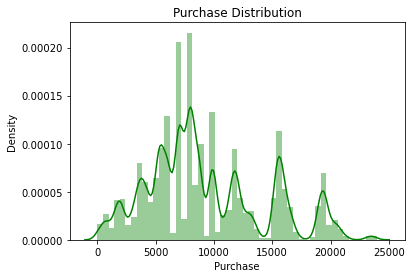

In [12]:
sns.distplot(data["Purchase"],color="g")
plt.title("Purchase Distribution")

We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian(Normal) Distribution.

Text(0.5, 1.0, 'Boxplot of Purchase')

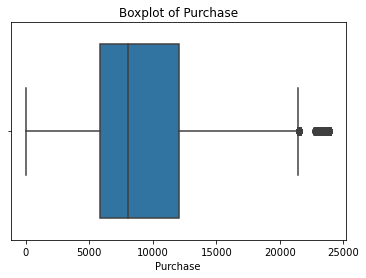

In [13]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")

In [14]:
data["Purchase"].skew()

0.6001400037087128

In [15]:
data["Purchase"].kurtosis()

-0.3383775655851702

In [16]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

# Gender

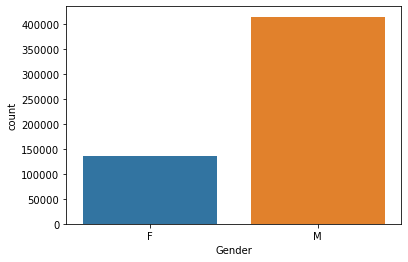

In [17]:
sns.countplot(data['Gender'])
plt.show()

There are more males than females

In [18]:
data.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

# Marital Status

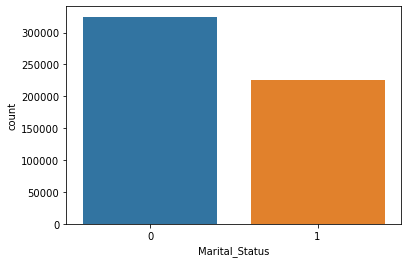

In [19]:
sns.countplot(data['Marital_Status'])
plt.show()

There are more unmarried people in the dataset who purchase more

In [20]:
data.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

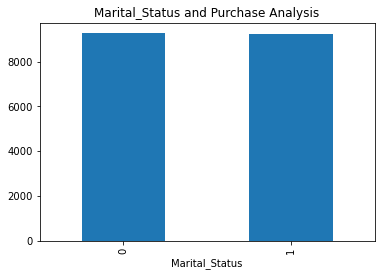

In [21]:
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

# Occupation

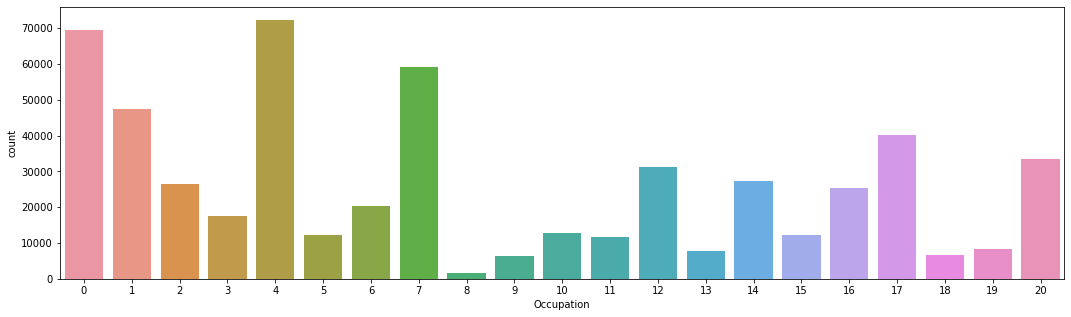

In [22]:
plt.figure(figsize=(18,5))
sns.countplot(data['Occupation'])
plt.show()

Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but to use since there is no way to reduce this number

In [23]:
occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


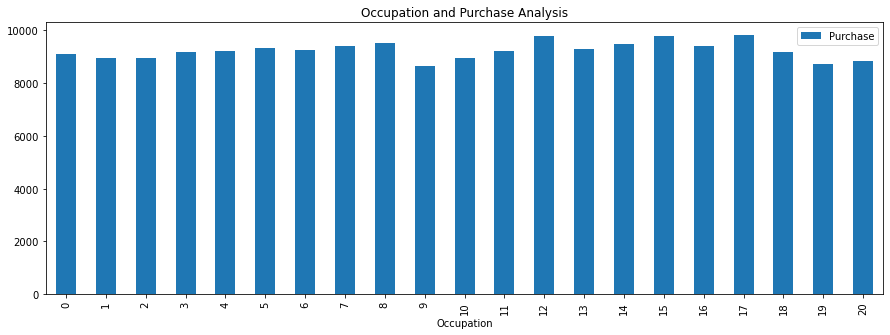

In [24]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

# City_Category

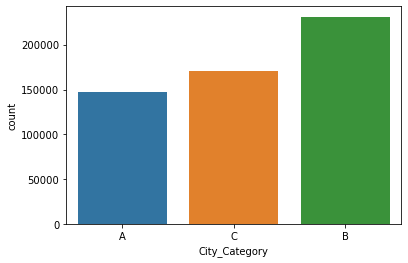

In [25]:
sns.countplot(data['City_Category'])
plt.show()

It is observed that city category B has made the most number of puchases.

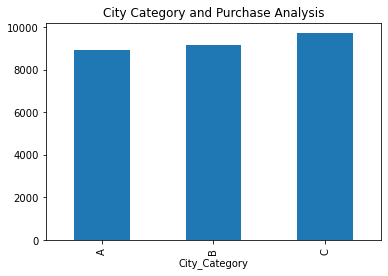

In [26]:
data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

The city whose buyers spend the most is city type ‘C’.

# Stay_In_Current_City_Years

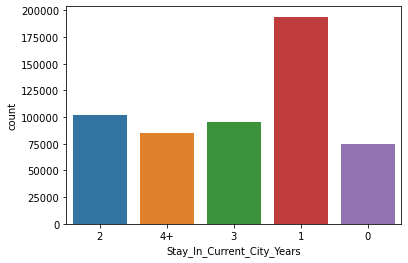

In [27]:
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

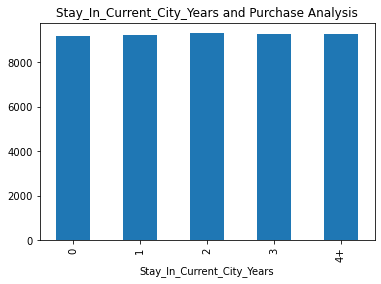

In [28]:
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

We see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

# Age

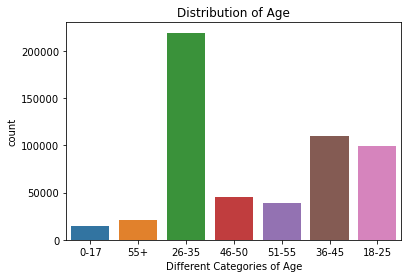

In [29]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

Age 26-35 Age group makes the most no of purchases in the age group.

<AxesSubplot:xlabel='Age'>

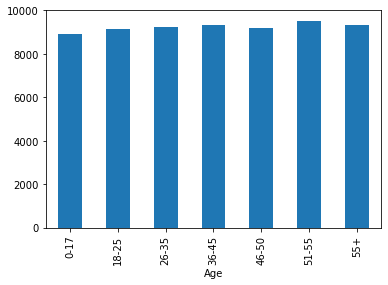

In [30]:
data.groupby("Age").mean()["Purchase"].plot(kind='bar')

Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

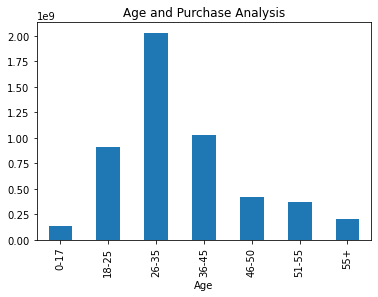

In [31]:
data.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

# Product_Category_1

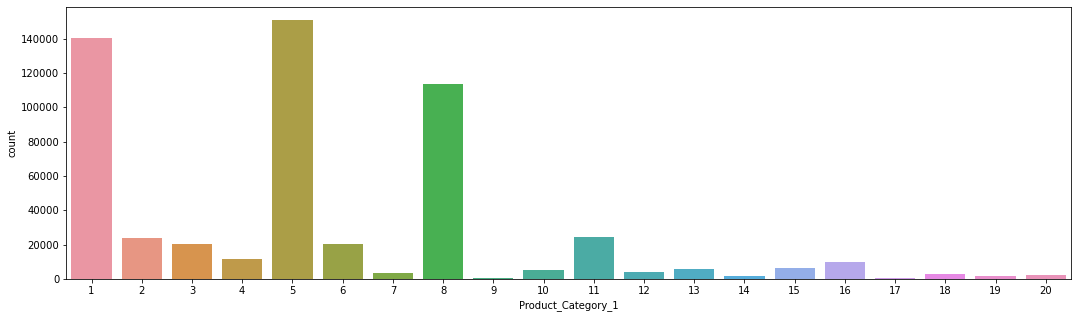

In [32]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_1'])
plt.show()

It is clear that Product_Category_1 numbers 1,5 and 8 stand out. Unfortunately we don't know which product each number represents as it is marked.

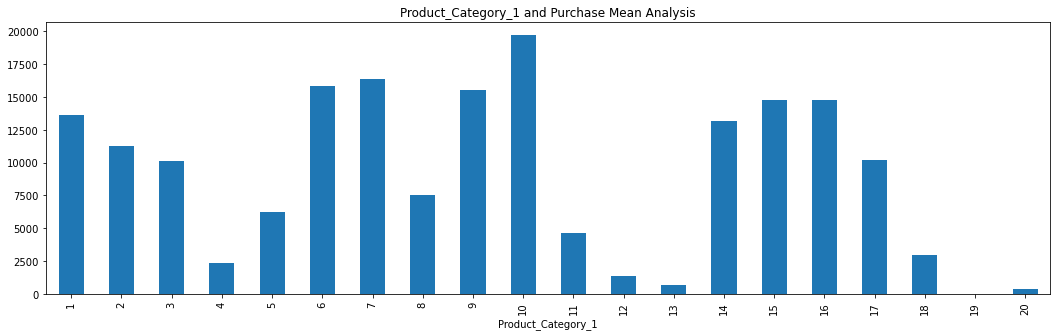

In [33]:
data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

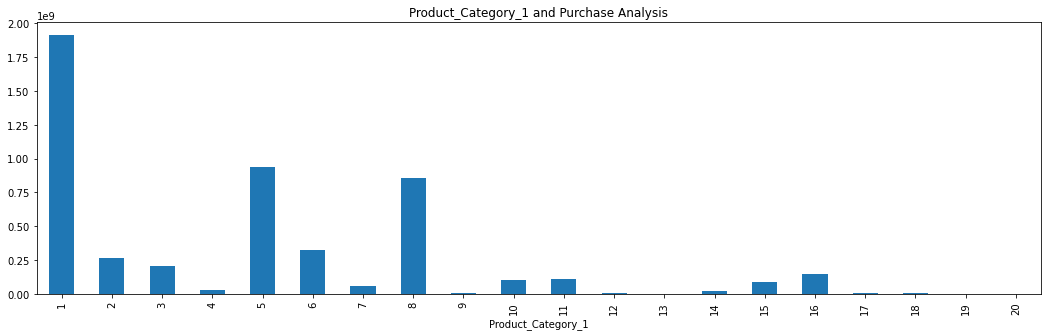

In [34]:
data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

The distribution that we saw for this predictor previously appears here. For example, those three products have the highest sum of sales since their were three most sold products.

# Product_Category_2

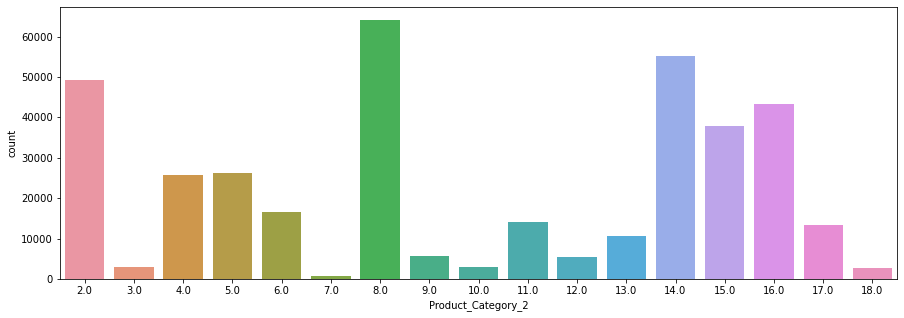

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(data['Product_Category_2'])
plt.show()

# Product_Category_3

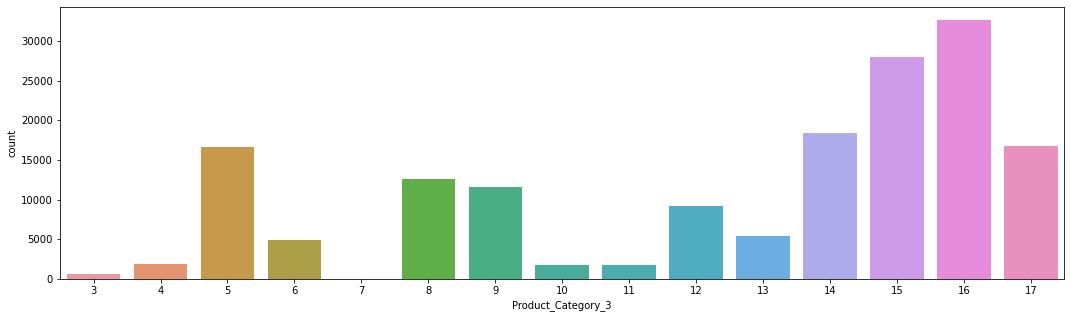

In [36]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_3'],order=np.arange(3,18,1))
plt.xticks=np.arange(3, 17, 1)

plt.show()

In [37]:
data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


# HeatMap

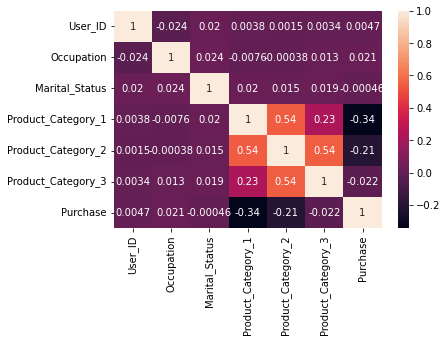

In [38]:
sns.heatmap(data.corr(),annot=True)
plt.show()

There is a some corellation between the product category groups.

# Dropping the unwanted columns

In [39]:
data = data.drop(["User_ID","Product_ID"],axis=1)

In [40]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [41]:
# Devide the data into continuous and categorical variables
cat=[]
con=[]
for i in data.columns:
    if (data[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [42]:
cat

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [43]:
con

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

# Encoding the categorical variables

In [44]:
data = pd.get_dummies(data, columns=['Stay_In_Current_City_Years'])

In [45]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
data['Gender'] = lr.fit_transform(data['Gender'])
data['Age'] = lr.fit_transform(data['Age'])
data['City_Category'] = lr.fit_transform(data['City_Category'])

In [46]:
data.head(10)

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,0,0,10,0,0,3,NaN,NaN,8370,0,0,1,0,0
1,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,0,0,10,0,0,12,NaN,NaN,1422,0,0,1,0,0
3,0,0,10,0,0,12,14.0,NaN,1057,0,0,1,0,0
4,1,6,16,2,0,8,NaN,NaN,7969,0,0,0,0,1
5,1,2,15,0,0,1,2.0,NaN,15227,0,0,0,1,0
6,1,4,7,1,1,1,8.0,17.0,19215,0,0,1,0,0
7,1,4,7,1,1,1,15.0,NaN,15854,0,0,1,0,0
8,1,4,7,1,1,1,16.0,NaN,15686,0,0,1,0,0
9,1,2,20,0,1,8,NaN,NaN,7871,0,1,0,0,0


# Filling missing values

In [47]:
data['Product_Category_2'] =data['Product_Category_2'].fillna(0).astype('int64')
data['Product_Category_3'] =data['Product_Category_3'].fillna(0).astype('int64')

In [48]:
data.isnull().sum()

Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Marital_Status                  0
Product_Category_1              0
Product_Category_2              0
Product_Category_3              0
Purchase                        0
Stay_In_Current_City_Years_0    0
Stay_In_Current_City_Years_1    0
Stay_In_Current_City_Years_2    0
Stay_In_Current_City_Years_3    0
Stay_In_Current_City_Years_4    0
dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Gender                        550068 non-null  int32
 1   Age                           550068 non-null  int32
 2   Occupation                    550068 non-null  int64
 3   City_Category                 550068 non-null  int32
 4   Marital_Status                550068 non-null  int64
 5   Product_Category_1            550068 non-null  int64
 6   Product_Category_2            550068 non-null  int64
 7   Product_Category_3            550068 non-null  int64
 8   Purchase                      550068 non-null  int64
 9   Stay_In_Current_City_Years_0  550068 non-null  uint8
 10  Stay_In_Current_City_Years_1  550068 non-null  uint8
 11  Stay_In_Current_City_Years_2  550068 non-null  uint8
 12  Stay_In_Current_City_Years_3  550068 non-null  uint8
 13  Stay_In_Curren

# Fitting the Machine learning Model

 Splitting data into independent and dependent variables

In [50]:
X = data.drop('Purchase',axis=1)
Y=data[["Purchase"]]

In [51]:
# Devide X and Y in training and Testing set

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=20)

<AxesSubplot:ylabel='Density'>

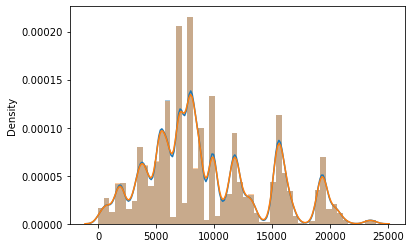

In [52]:
sns.distplot(Y)
sns.distplot(ytrain)

In [53]:
# fit the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

3529.0810184764364

In [54]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(xtrain, ytrain)
dt_pred = regressor.predict(xtest)
mean_absolute_error(ytest, dt_pred)

2373.585045112254